## -1.Meme

In [26]:
str = 'r'
print('Python makes b'+40*str)

Python makes brrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr


## 0.Import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

Esc+m - text
b - down
a - up
dd - delete
##


## 1.Data preparation

In [28]:
data = pd.read_csv('dataset_malwares.csv')
data.head(3)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [30]:
data.drop_duplicates(inplace=True)
data.head(1)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0


In [31]:
listOfNameToDrop = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        listOfNameToDrop.append(col)
print(len(listOfNameToDrop))
print(listOfNameToDrop)

8
['e_magic', 'SectionMaxEntropy', 'SectionMaxRawsize', 'SectionMaxVirtualsize', 'SectionMinPhysical', 'SectionMinVirtual', 'SectionMinPointerData', 'SectionMainChar']


In [32]:
data.drop(listOfNameToDrop, axis = 1, inplace= True)
data

,Name,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,144,3,0,4,0,65535,0,184,0,...,245248,3758096608,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,144,3,0,4,0,65535,0,184,0,...,314880,3791650880,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,144,3,0,4,0,65535,0,184,0,...,45056,3221225536,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,144,3,0,4,0,65535,0,184,0,...,58880,3224371328,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,144,3,0,4,0,65535,0,184,0,...,54784,3227516992,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,144,3,0,4,0,65535,0,184,0,...,23040,3221225536,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,144,3,0,4,0,65535,0,184,0,...,18795520,3221225536,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,0,0,0,0,0,0,0,0,0,...,256000,3758096448,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,144,3,0,4,0,65535,0,184,0,...,355328,3221225536,12,162,8,89008,94904,102400,0,0


## 2.Exploratory data analysis

In [33]:
data.describe()

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,...,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,107.662434,...,2.327726e+07,3.163632e+09,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,1826.995907,...,2.918776e+08,5.860332e+08,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,5.120000e+02,1.073742e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.556800e+04,3.221226e+09,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,1.413120e+05,3.221226e+09,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.057600e+05,3.221226e+09,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,60447.000000,...,3.763037e+09,4.294967e+09,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [34]:
data.drop(['Name'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19611 entries, 0 to 19610
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   e_cblp                        19611 non-null  int64  
 1   e_cp                          19611 non-null  int64  
 2   e_crlc                        19611 non-null  int64  
 3   e_cparhdr                     19611 non-null  int64  
 4   e_minalloc                    19611 non-null  int64  
 5   e_maxalloc                    19611 non-null  int64  
 6   e_ss                          19611 non-null  int64  
 7   e_sp                          19611 non-null  int64  
 8   e_csum                        19611 non-null  int64  
 9   e_ip                          19611 non-null  int64  
 10  e_cs                          19611 non-null  int64  
 11  e_lfarlc                      19611 non-null  int64  
 12  e_ovno                        19611 non-null  int64  
 13  e

Malware
14599
Not Malware
5012


<BarContainer object of 2 artists>

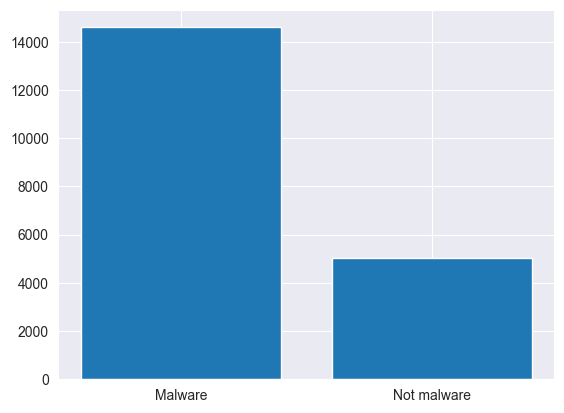

In [35]:
countMalware = len(data[data.Malware == 1])
print("Malware")
print(countMalware)

countNotMalware = len(data[data.Malware == 0])
print('Not Malware')
print(countNotMalware)

fig, ax = plt.subplots()
ax.bar(['Malware', 'Not malware'], [countMalware, countNotMalware])


In [36]:
malware = data.Malware
data.drop(['Malware'], axis=1, inplace=True)
data.head()

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,144,3,0,4,0,65535,0,184,0,0,...,245248,3758096608,7,152,0,0,54440,77824,73728,0
1,144,3,0,4,0,65535,0,184,0,0,...,314880,3791650880,16,311,0,0,262276,294912,0,346112
2,144,3,0,4,0,65535,0,184,0,0,...,45056,3221225536,6,176,0,0,36864,40960,0,0
3,144,3,0,4,0,65535,0,184,0,0,...,58880,3224371328,8,155,0,0,356352,1003520,0,14109472
4,144,3,0,4,0,65535,0,184,0,0,...,54784,3227516992,2,43,0,0,61440,73728,0,90624


In [37]:
corrMatrix = data.corr()
corrMatrix

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
e_cblp,1.000000,0.660911,0.658889,0.612555,0.738562,-0.126543,0.383272,0.499692,0.344250,0.332694,...,-0.002794,0.032012,-0.012362,-0.013954,-0.003183,-0.000563,0.000085,-0.001265,0.359297,-0.000019
e_cp,0.660911,1.000000,0.855558,0.631609,0.679133,-0.134968,0.465528,0.589448,0.484143,0.263771,...,-0.003721,0.024693,-0.016699,-0.018171,-0.004110,-0.000716,0.002131,0.001676,0.279214,0.000095
e_crlc,0.658889,0.855558,1.000000,0.738859,0.793224,-0.147379,0.589649,0.625598,0.548313,0.266980,...,-0.003181,0.022481,-0.018810,-0.018811,-0.003410,-0.000604,0.002046,0.001344,0.324521,0.000651
e_cparhdr,0.612555,0.631609,0.738859,1.000000,0.866721,-0.154192,0.246532,0.618349,0.568015,0.278247,...,-0.003066,0.017369,-0.018842,-0.019757,-0.003320,-0.000570,0.000035,-0.001346,0.299377,0.000036
e_minalloc,0.738562,0.679133,0.793224,0.866721,1.000000,-0.165210,0.496592,0.734340,0.586267,0.317579,...,-0.003211,0.022807,-0.019301,-0.022937,-0.003249,-0.000580,0.000198,-0.001499,0.384137,0.000521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImageDirectoryEntryExport,-0.000563,-0.000716,-0.000604,-0.000570,-0.000580,0.001919,-0.000247,-0.000517,-0.000421,-0.000885,...,-0.000859,0.003285,0.000809,0.003010,0.007569,1.000000,0.033720,0.023040,-0.000114,0.002499
ImageDirectoryEntryImport,0.000085,0.002131,0.002046,0.000035,0.000198,0.009798,-0.000758,0.001010,0.000445,-0.002855,...,-0.000635,0.032340,0.033719,0.050796,0.041997,0.033720,1.000000,0.227299,0.001845,0.011594
ImageDirectoryEntryResource,-0.001265,0.001676,0.001344,-0.001346,-0.001499,0.005752,-0.000873,-0.000875,-0.000714,-0.003236,...,0.000564,0.020728,0.023624,0.049349,0.029397,0.023040,0.227299,1.000000,0.000513,0.008297
ImageDirectoryEntryException,0.359297,0.279214,0.324521,0.299377,0.384137,-0.099161,-0.000345,0.283131,-0.000617,0.002427,...,-0.000991,0.020704,-0.015547,-0.013903,-0.000445,-0.000114,0.001845,0.000513,1.000000,0.004849


In [38]:
# Make a mask above diagonal
mask = np.triu(np.ones(corrMatrix.shape, dtype=bool))
np.fill_diagonal(mask, False)
mask

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [39]:
# Find indexes with corr > 0.3
high_corr = np.where((abs(corrMatrix) > 0.3) & mask)
high_corr = high_corr[1]
high_corr = np.unique(high_corr)
row_arr = high_corr.reshape((1, high_corr.shape[0]))
row_arr

array([[ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14, 19, 20, 21, 22,
        23, 25, 26, 27, 31, 32, 34, 35, 36, 37, 38, 44, 49, 51, 52, 53,
        56, 58, 59, 60, 62, 65, 66, 67]], dtype=int64)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19611 entries, 0 to 19610
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_cblp                       19611 non-null  int64  
 1   e_maxalloc                   19611 non-null  int64  
 2   e_oemid                      19611 non-null  int64  
 3   e_lfanew                     19611 non-null  int64  
 4   Machine                      19611 non-null  int64  
 5   NumberOfSections             19611 non-null  int64  
 6   TimeDateStamp                19611 non-null  int64  
 7   MajorLinkerVersion           19611 non-null  int64  
 8   SizeOfUninitializedData      19611 non-null  int64  
 9   AddressOfEntryPoint          19611 non-null  int64  
 10  BaseOfCode                   19611 non-null  int64  
 11  FileAlignment                19611 non-null  int64  
 12  MinorSubsystemVersion        19611 non-null  int64  
 13  SizeOfHeaders   

<Axes: >

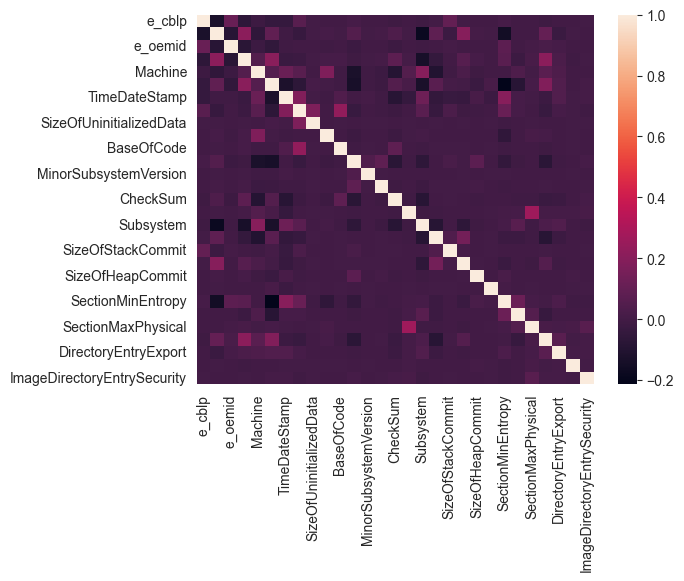

In [40]:
for i in row_arr:
    data.drop(columns = data.columns[i], axis=1, inplace=True)
print(data.info())
sns.heatmap(data.corr())

### Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(data, malware, test_size=0.2, random_state=0)

print('test 1/0:')
print(len(Y_test[Y_test == 1]), end='/')
print(len(Y_test[Y_test == 0]), end='\n')
print('train 1/0:')
print(len(Y_train[Y_train == 1]), end='/')
print(len(Y_train[Y_train == 0]), end='\n')

test 1/0:
2919/1004
train 1/0:
11680/4008


## 3.Logistic Regression

In [42]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
predict = clf.predict(X_test)

D:\BSU\3 course\Нейросетевые технологии\lab1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print('[[TP FN]\n [FP TN]]')
print(confusion_matrix(Y_test, predict))

[[TP FN]
 [FP TN]]
[[ 734  270]
 [ 158 2761]]


In [44]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1004
           1       0.91      0.95      0.93      2919

    accuracy                           0.89      3923
   macro avg       0.87      0.84      0.85      3923
weighted avg       0.89      0.89      0.89      3923



*Accuracy (качество - доля верных ответов). Выборка несбалансированна, поэтому критерий не подходит.
*Precision (точность - насколько можно доверять модели, когда она выдает положительный класс). Недостаточно, потому что не показывает, насколько модель охватывает все положительные метки.
*Recall (полнота - доля положительных объектов, которые охватывает модель). В совокупности с precision дает более полную оценку работы модели. Хорошая модель имеет высокие значения как precision, так и recall.
*F1-score (гармоническое среднее между precision и recall). Этот показатель подходит для несбалансированных выборок.

## 4.Neural net

In [45]:
mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 11), random_state=1)

mlp.fit(X_train, Y_train)
predict = mlp.predict(X_test)

In [46]:
print('[[TP FN]\n [FP TN]]')
print(confusion_matrix(Y_test, predict))

[[TP FN]
 [FP TN]]
[[ 730  274]
 [ 172 2747]]


In [47]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1004
           1       0.91      0.94      0.92      2919

    accuracy                           0.89      3923
   macro avg       0.86      0.83      0.85      3923
weighted avg       0.88      0.89      0.88      3923



*Accuracy (качество - доля верных ответов). Выборка несбалансированна, поэтому критерий не подходит.
*Precision (точность - насколько можно доверять модели, когда она выдает положительный класс). Недостаточно, потому что не показывает, насколько модель охватывает все положительные метки.
*Recall (полнота - доля положительных объектов, которые охватывает модель). В совокупности с precision дает более полную оценку работы модели. Хорошая модель имеет высокие значения как precision, так и recall.
*F1-score (гармоническое среднее между precision и recall). Этот показатель подходит для несбалансированных выборок.